In [51]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df=pd.read_excel("preprocessed.xlsx")

In [31]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['HaveWorkedWith'], axis=1, inplace=True)
print(df.columns)

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'MentalHealth',
       'MainBranch', 'YearsCode', 'YearsCodePro', 'PreviousSalary',
       'ComputerSkills', 'Employed'],
      dtype='object')


In [84]:
def split(df, train_split=0.8, val_split=0.1, test_split=0.1):
    df_sample = df.sample(frac=1, random_state=12)
    indices_or_sections = [int(train_split * len(df)), int((1 - val_split - test_split) * len(df))]
    train, val, test = np.split(df_sample, indices_or_sections)
    return train, val, test
train, val, test=split(df, 0.9,0,0.1)
train_x=train.drop(['Employed'], axis=1)
train_y=train['Employed']

In [126]:
model=keras.Sequential([
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(2, activation='linear')
])

In [127]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )
history=model.fit(train_x, train_y,
                  validation_split = 0.1, 
                  epochs=50,
                  verbose=2
                 )

Epoch 1/50
1860/1860 - 2s - loss: 468.0601 - accuracy: 0.5091 - val_loss: 4.0956 - val_accuracy: 0.5384 - 2s/epoch - 1ms/step
Epoch 2/50
1860/1860 - 2s - loss: 15.1937 - accuracy: 0.5400 - val_loss: 2.1220 - val_accuracy: 0.6314 - 2s/epoch - 911us/step
Epoch 3/50
1860/1860 - 2s - loss: 12.6980 - accuracy: 0.5645 - val_loss: 20.9276 - val_accuracy: 0.5088 - 2s/epoch - 888us/step
Epoch 4/50
1860/1860 - 2s - loss: 11.0967 - accuracy: 0.5847 - val_loss: 8.1053 - val_accuracy: 0.5609 - 2s/epoch - 867us/step
Epoch 5/50
1860/1860 - 2s - loss: 11.7573 - accuracy: 0.5957 - val_loss: 7.9099 - val_accuracy: 0.5696 - 2s/epoch - 865us/step
Epoch 6/50
1860/1860 - 2s - loss: 9.0383 - accuracy: 0.6147 - val_loss: 1.2492 - val_accuracy: 0.7447 - 2s/epoch - 938us/step
Epoch 7/50
1860/1860 - 2s - loss: 8.2577 - accuracy: 0.6291 - val_loss: 4.5996 - val_accuracy: 0.6225 - 2s/epoch - 902us/step
Epoch 8/50
1860/1860 - 2s - loss: 7.0223 - accuracy: 0.6469 - val_loss: 1.4306 - val_accuracy: 0.7411 - 2s/epoch 

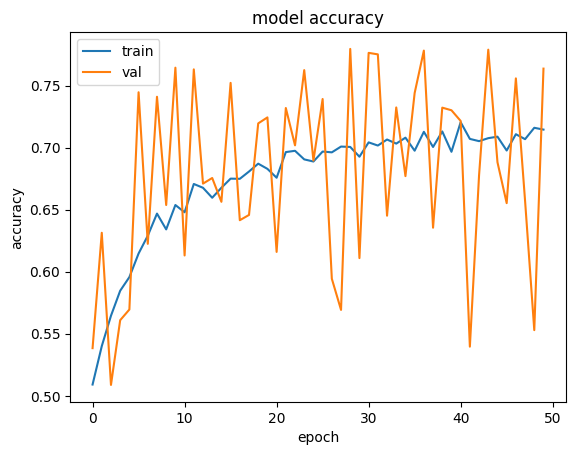

In [129]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [82]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 10)                110       
                                                                 
 dense_45 (Dense)            (None, 15)                165       
                                                                 
 dense_46 (Dense)            (None, 1)                 16        
                                                                 
Total params: 291 (1.14 KB)
Trainable params: 291 (1.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
